In [1]:
import plot_global
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np
from scipy.interpolate import interp1d
from read_and_plot import *

d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Fuel_Reduction'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Electricity_Reduction'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:37: SettingWi

In [2]:
statistics_df = plot_global.statistics_df
df = statistics_df
test_df = df[(df['Vehicle_Fleet'] == '2030') & (df['Demand_Percentage(%)'] == 100) & (df['Eco_Routing_with_Travel_Time(0/1)'] == 0) & (df['Prediction_Horizon(min)'] == 5)]
test_df.columns
test_df['Fuel_Used_ICE_Avg(gallon)']

0     0.000000
1     0.232723
2     0.234156
3     0.232605
4     0.243831
5     0.251510
6     0.259193
7     0.256974
8     0.278547
9     0.278714
10    0.292274
Name: Fuel_Used_ICE_Avg(gallon), dtype: float64

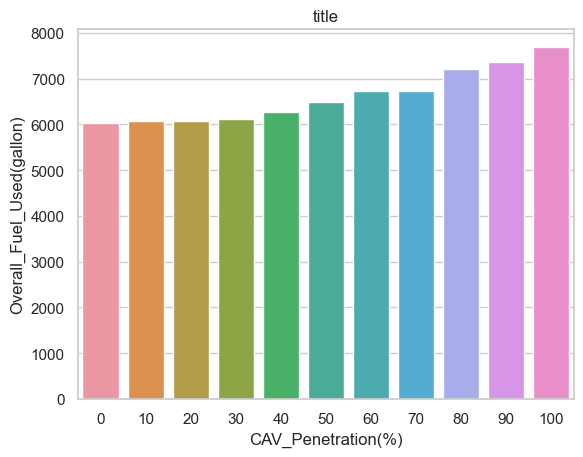

In [3]:
# sns.set_theme(style='whitegrid', palette='Paired')
sns.set_theme(style='whitegrid', palette='bright')
# sns.set_style("whitegrid")
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df, order=5, ci=None)
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df, hue='Eco_Routing_with_Travel_Time(0/1)', markers=['O'], markersize = 5)
g = sns.barplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
# g = (g.set_axis_labels('Tips', 'Total bill(USD)').set(xlim=(0,10), ylim=(0,100)))
plt.title('title')
plt.show(g)
# g.savefig('test.pdf')

In [4]:
vehicle_fleet = '2030'
demand_percentage = 150
eco_routing_with_travel_time = 0
prediction_horizon = 10

target_df = statistics_df[(statistics_df['Vehicle_Fleet'] == vehicle_fleet) 
             & (statistics_df['Demand_Percentage(%)'] == demand_percentage) 
             & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == eco_routing_with_travel_time) 
             & (statistics_df['Prediction_Horizon(min)'] == prediction_horizon)]

# # target_df.reset_index(drop=True, inplace=True)
target_df


,Time,Demand_Percentage(%),Prediction_Horizon(min),CAV_Penetration(%),Eco_Routing_with_Travel_Time(0/1),Vehicle_Fleet,Overall_Travel_Time_Avg(s),Overall_Fuel_Used(gallon),Overall_Electricity_Used(kWh),Overall_Fuel_Cost($),...,Vehicle_Count_HFCV_After1hour,Vehicle_Count_HFCV_NONCAV_After1hour,number_of_vehicles_left_in_the_network,Overall_Fuel_Reduction,Overall_Electricity_Reduction,ICE_Reduction,BEV_Reduction,PHEV_Reduction,HFCV_Reduction,Money_Reduction
451,2.023080e+13,150,10,0,0,2030,1631.39,14161.5,18196.7,49565.2,...,0,252,7562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
452,2.023080e+13,150,10,10,0,2030,1595.81,13188.7,17142.9,46160.5,...,17,211,6042,-6.869329,-5.791160,-8.919161,-12.141800,-14.096011,-22.292053,-6.778512
453,2.023080e+13,150,10,20,0,2030,1397.14,13203.4,19429.4,46211.7,...,52,175,5335,-6.765526,6.774305,-11.541796,-4.582323,-6.190789,-21.938490,-5.627580
454,2.023080e+13,150,10,30,0,2030,1582.40,13975.1,18081.8,48912.8,...,69,157,7064,-1.316245,-0.631433,-5.212246,-10.461486,-12.217825,-13.888154,-1.258686
455,2.023080e+13,150,10,40,0,2030,1519.74,13941.1,18745.9,48793.8,...,105,137,6440,-1.556332,3.018130,-3.807637,-11.009970,-10.216326,-17.969921,-1.171777
456,2.023080e+13,150,10,50,0,2030,1516.67,13784.6,18386.9,48245.9,...,112,134,5091,-2.661441,1.045244,-2.264878,-8.296987,-8.578797,-19.131310,-2.350115
457,2.023080e+13,150,10,60,0,2030,1473.42,13670.7,18160.0,47847.5,...,145,88,6111,-3.465735,-0.201685,-4.837702,-6.326162,-8.057705,-16.041869,-3.191167
458,2.023080e+13,150,10,70,0,2030,1574.87,13967.0,17566.2,48884.5,...,164,81,6530,-1.373442,-3.464914,-1.162436,-8.398472,-7.268111,-13.580165,-1.549182
459,2.023080e+13,150,10,80,0,2030,1602.91,14338.0,17165.4,50183.0,...,199,51,6169,1.246337,-5.667511,0.356381,-7.904991,-8.287754,-18.408750,0.665221
460,2.023080e+13,150,10,90,0,2030,1555.92,13956.4,16458.7,48847.4,...,201,25,7502,-1.448293,-9.551182,-2.433024,-9.792924,-10.338312,-17.588427,-2.129379


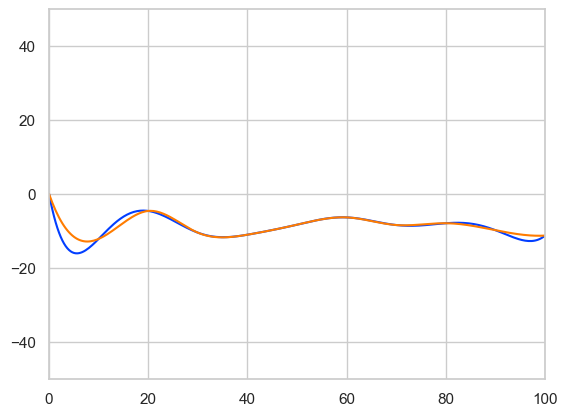

In [5]:
fig, ax = plt.subplots()
x = target_df['CAV_Penetration(%)']
y = target_df['BEV_Reduction']
xnew = np.linspace(x.min(), x.max(), 300)
gfg = make_interp_spline(x, y, k = 5)
y_new = gfg(xnew)
plt.plot(xnew, y_new)
# plt.scatter(x,y)

ubic_interpolation_model = interp1d(x, y, kind = "cubic")
y_new = ubic_interpolation_model(xnew)
plt.plot(xnew, y_new)
# plt.scatter(x,y)
plt.ylim([-50, 50])
plt.xlim([0,100])
plt.show()
# ax.plot(test_df['CAV_Penetration(%)'], test_df['Overall_Fuel_Used(gallon)'], marker = "o", markersize = 5)

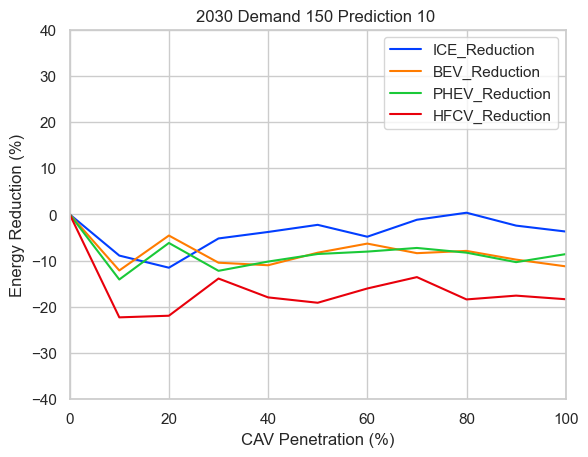

In [6]:
# sns.set_theme(style='whitegrid', palette='Paired')
sns.set_theme(style='whitegrid', palette='bright')
# sns.set_style("whitegrid")

# g = sns.barplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Reduction', data = target_df, legend='full')
# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Electricity_Reduction', data = target_df) 
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'ICE_Reduction', data = target_df, label = 'ICE_Reduction')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'BEV_Reduction', data = target_df, label = 'BEV_Reduction')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'PHEV_Reduction', data = target_df, label = 'PHEV_Reduction')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'HFCV_Reduction', data = target_df, label = 'HFCV_Reduction')
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'ICE_Reduction', data = target_df, order=5, ci=None)
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'BEV_Reduction', data = target_df, order=5, ci=None)
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'PHEV_Reduction', data = target_df, order=5, ci=None)
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'HFCV_Reduction', data = target_df, order=5, ci=None)
plt.title('{} Demand {} Prediction {} '.format(vehicle_fleet, demand_percentage, prediction_horizon))
plt.ylabel("Energy Reduction (%)")
plt.xlabel("CAV Penetration (%)")
plt.ylim([-40, 40])
plt.xlim([0,100])
plt.legend()
plt.show(g)
# g.savefig('test.pdf')

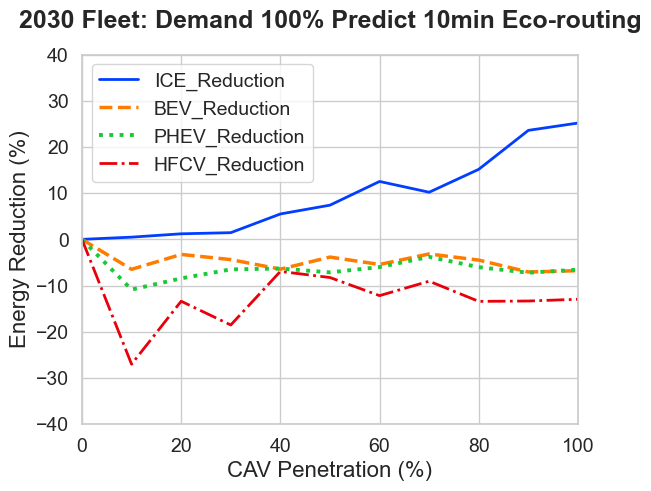

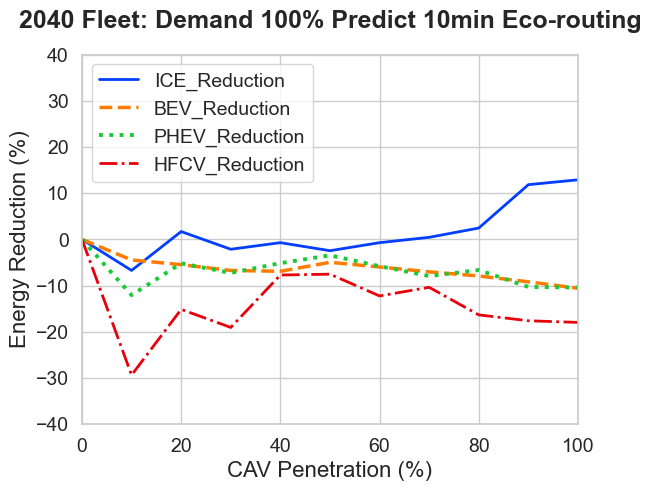

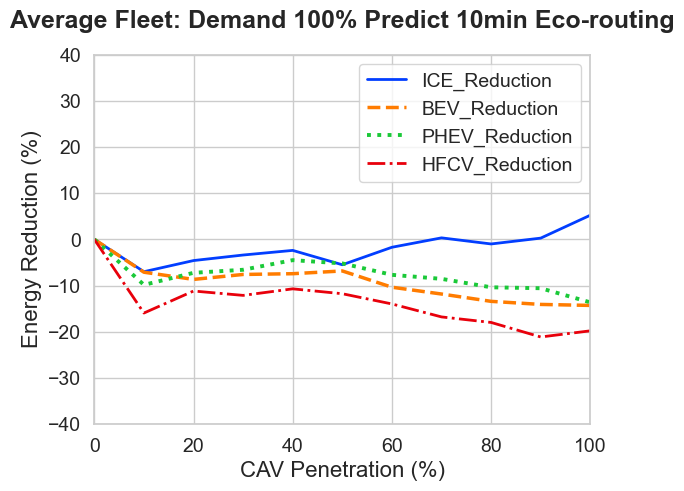

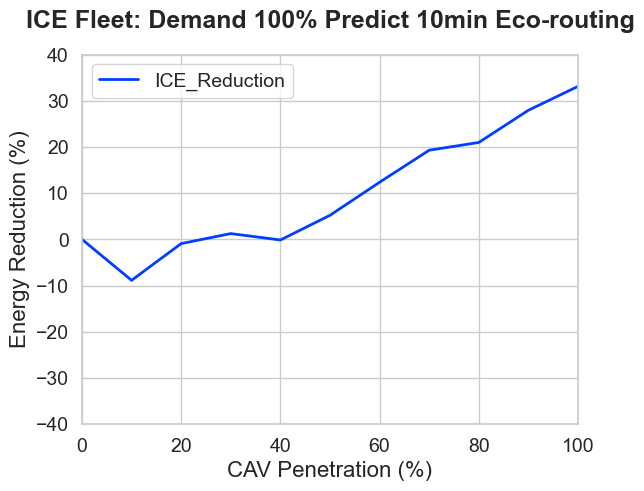

In [7]:
whether_save_fig = False
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10

vehicle_fleet='2030'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='2040'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='Average'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='ICE'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)



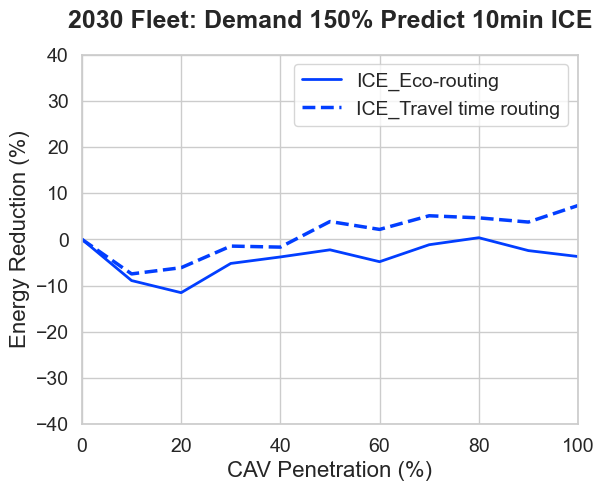

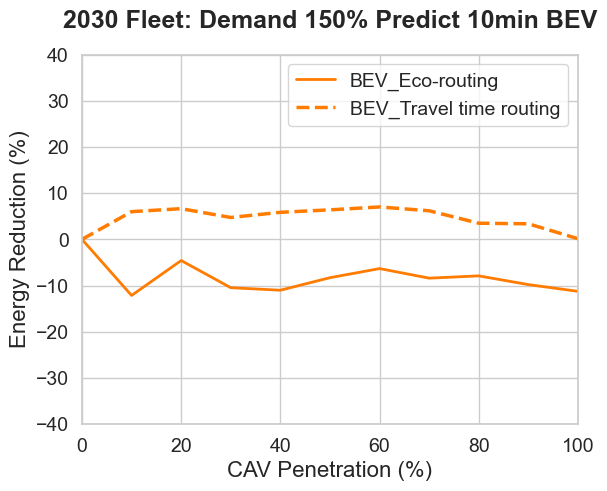

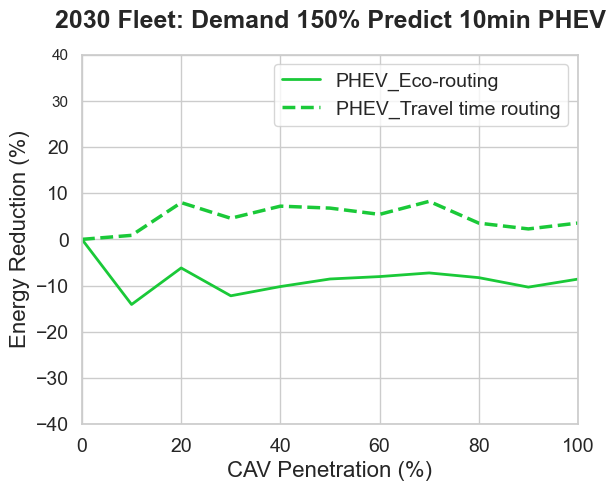

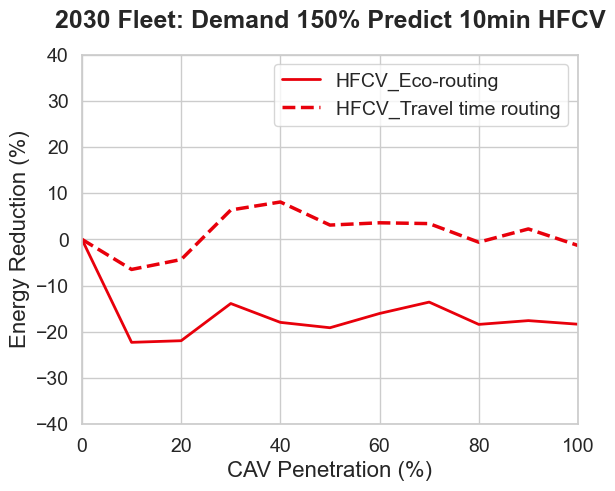

In [8]:
vehicle_fleet='2030'
demand_percentage=150
prediction_horizon=10

whether_save_fig = False
vehicle_type='ICE'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='BEV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='PHEV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='HFCV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)



In [9]:
statistics_df.columns

Index(['Time', 'Demand_Percentage(%)', 'Prediction_Horizon(min)',
       'CAV_Penetration(%)', 'Eco_Routing_with_Travel_Time(0/1)',
       'Vehicle_Fleet', 'Overall_Travel_Time_Avg(s)',
       'Overall_Fuel_Used(gallon)', 'Overall_Electricity_Used(kWh)',
       'Overall_Fuel_Cost($)', 'Overall_Electricity_Cost($)',
       'Total_Number_of_Vehicles', 'Travel_Time_ICE_Avg(s)',
       'Travel_Time_ICE_NONCAV_Avg(s)', 'Travel_Time_BEV_Avg(s)',
       'Travel_Time_BEV_NONCAV_Avg(s)', 'Travel_Time_PHEV_Avg(s)',
       'Travel_Time_PHEV_NONCAV_Avg(s)', 'Travel_Time_HFCV_Avg(s)',
       'Travel_Time_HFCV_NONCAV_Avg(s)', 'Fuel_Used_ICE_Avg(gallon)',
       'Fuel_Used_ICE_NONCAV_Avg(gallon)', 'Fuel_Used_BEV_Avg(gallon)',
       'Fuel_Used_BEV_NONCAV_Avg(gallon)', 'Fuel_Used_PHEV_Avg(gallon)',
       'Fuel_Used_PHEV_NONCAV_Avg(gallon)', 'Fuel_Used_HFCV_Avg(gallon)',
       'Fuel_Used_HFCV_NONCAV_Avg(gallon)', 'Electricity_Used_ICE_Avg(kWh)',
       'Electricity_Used_ICE_NONCAV_Avg(kWh)', 'Electri

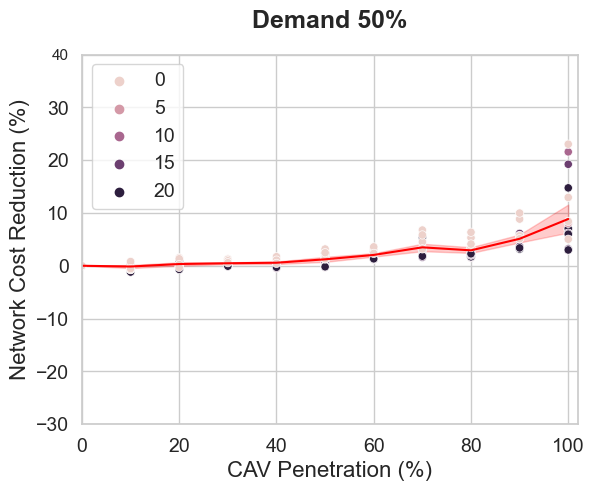

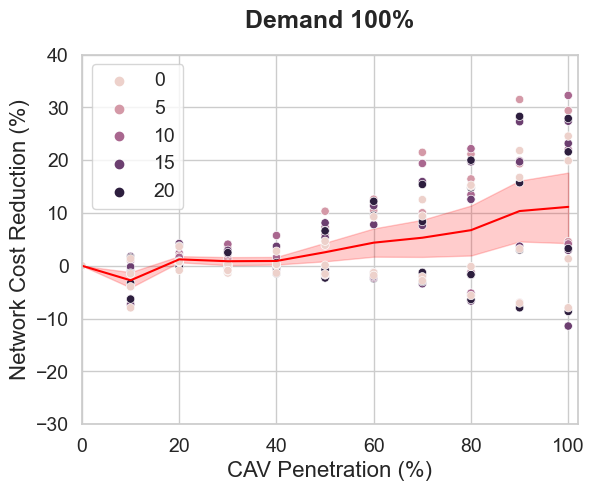

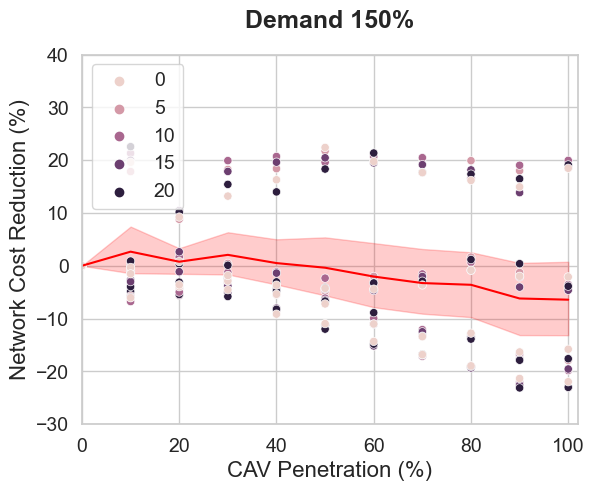

In [10]:
whether_save_fig = False
demand_percentage = 50
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)
demand_percentage = 100
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)
demand_percentage = 150
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)

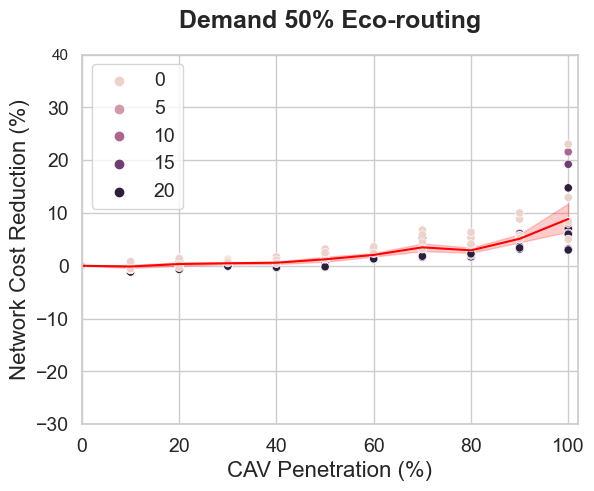

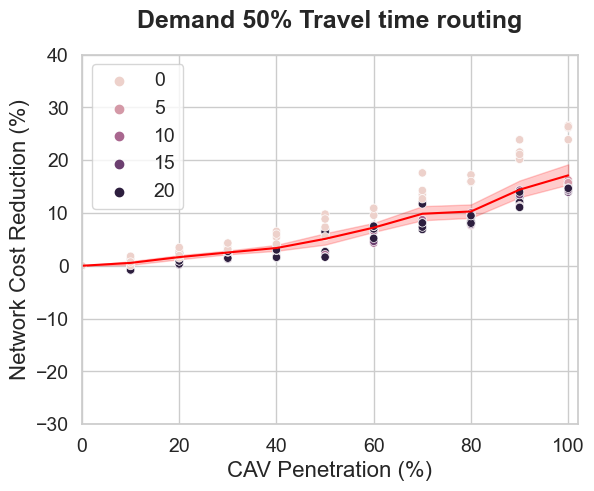

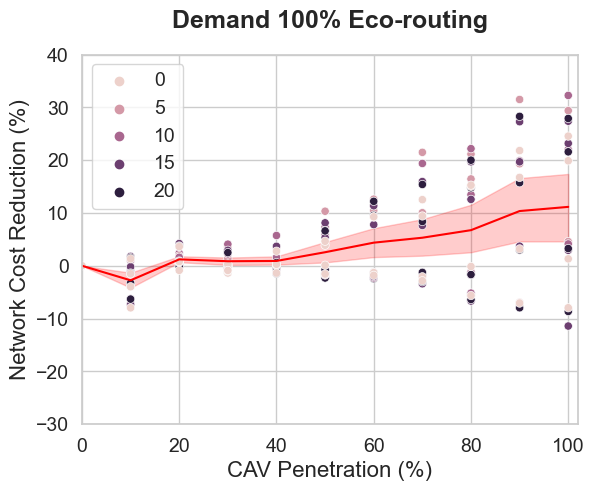

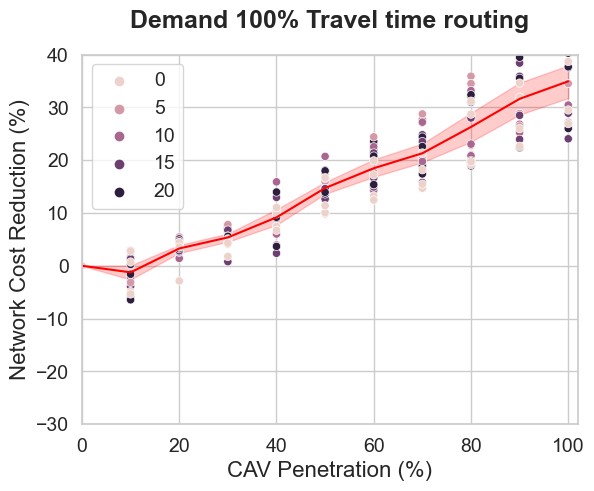

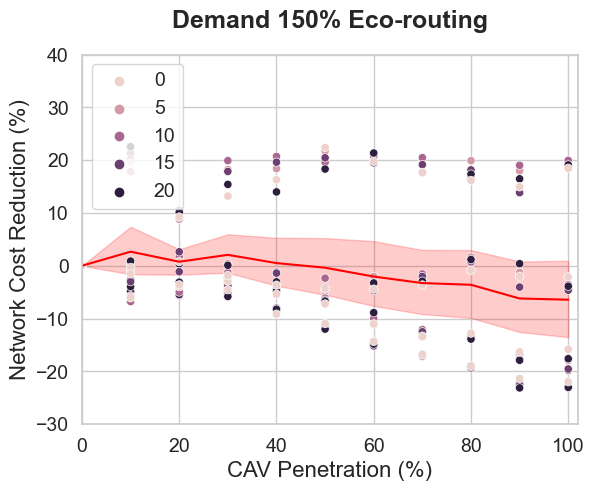

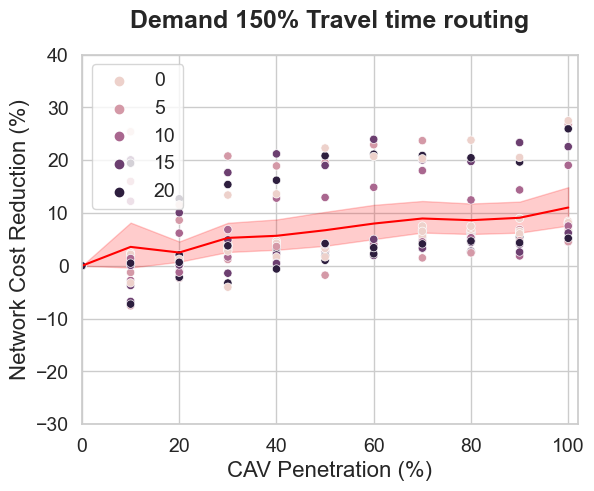

In [11]:
whether_save_fig = False
demand_percentage = 50
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

demand_percentage = 100
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

demand_percentage = 150
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

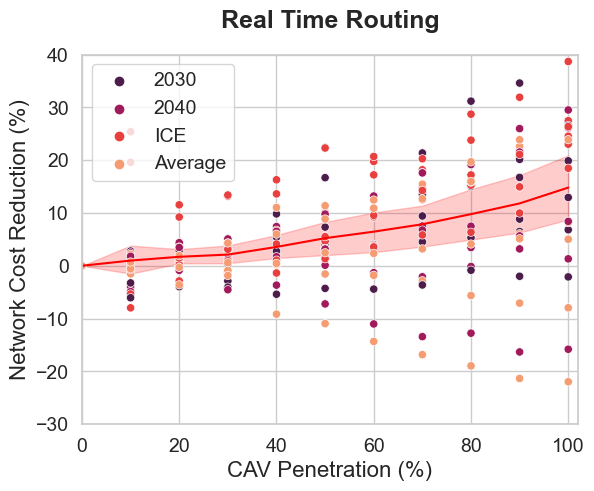

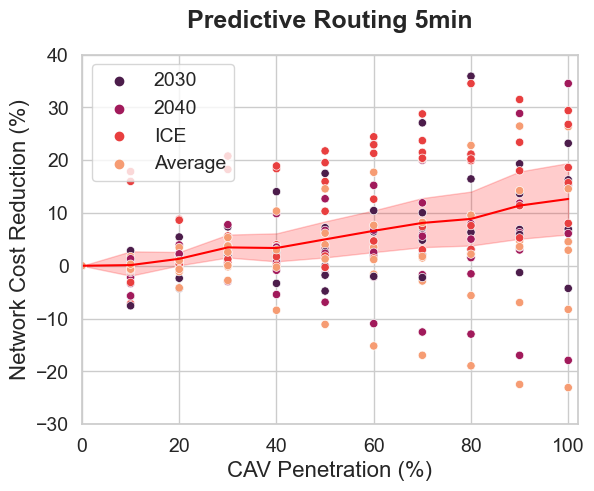

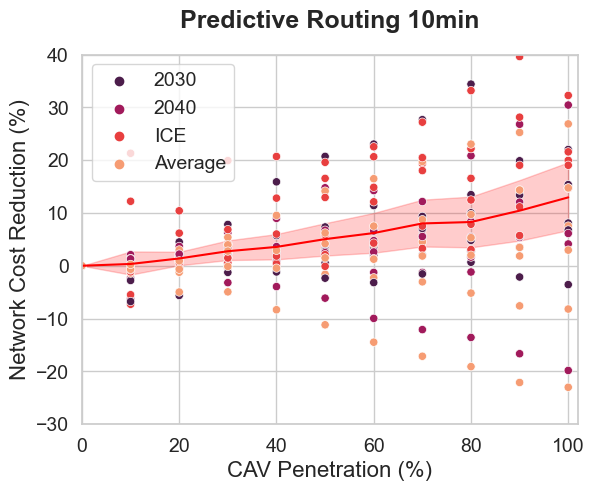

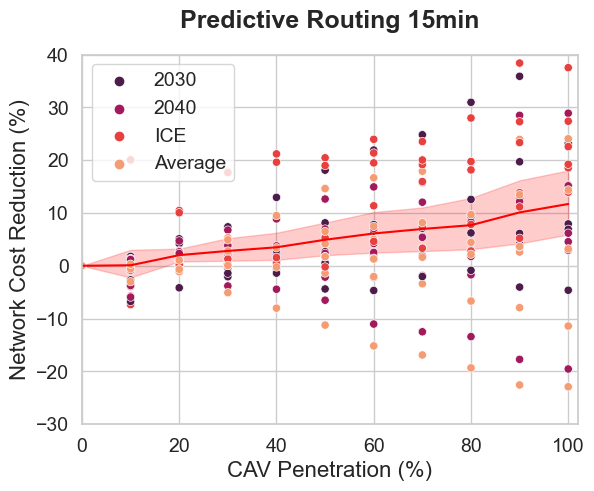

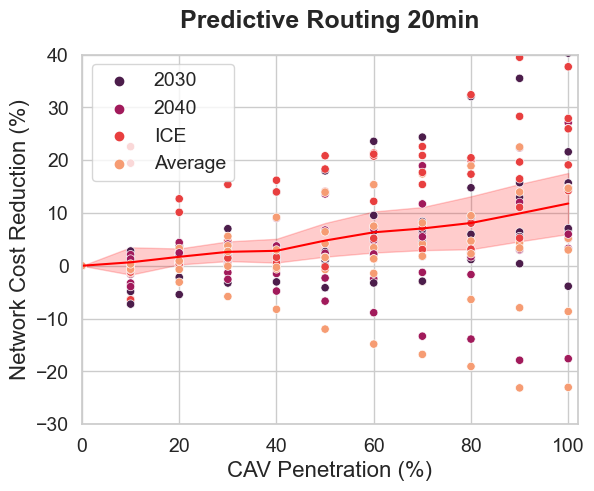

In [12]:
whether_save_fig = False
predict_horizon = 0
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 5
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 10
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 15
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 20
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)

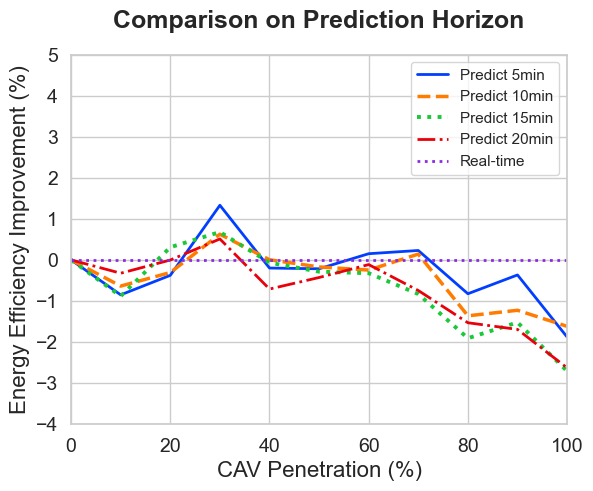

In [13]:
plotComparePredictHorizon(save_fig = True)

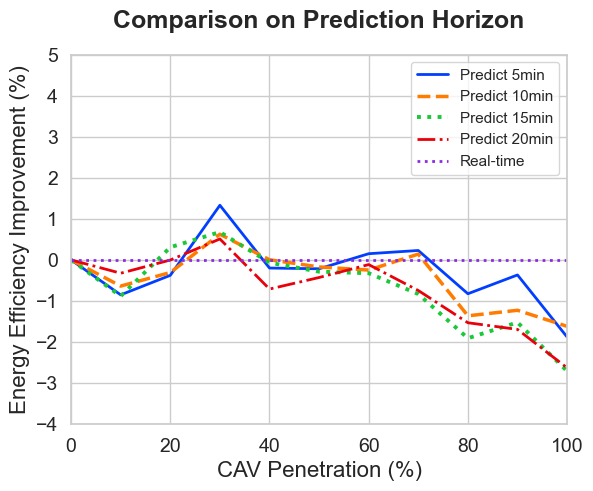

In [14]:
save_fig = False

linewidths = [2, 2.5, 2.8, 2, 2]
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', 'dotted']
sns.set_theme(style='whitegrid', palette='bright')

statistics_df = plot_global.statistics_df

target_df_p0 = statistics_df[(statistics_df['Prediction_Horizon(min)'] == 0)]
p0 = target_df_p0.groupby(['CAV_Penetration(%)'])['Money_Reduction'].mean()
for idx in p0.index:
    p0[idx] += 100
for line_idx, predict_horizon in enumerate([5, 10, 15, 20, 0]):
    target_df = statistics_df[(
        statistics_df['Prediction_Horizon(min)'] == predict_horizon)]
    mp = target_df.groupby(['CAV_Penetration(%)'])[
        'Money_Reduction'].mean()
    for idx in mp.index:
        mp[idx] += 100
        mp[idx] = (mp[idx] - p0[idx]) / p0[idx] * 100.0
    if predict_horizon != 0:
        plt_label='Predict {}min'.format(predict_horizon)
    else:
        plt_label = 'Real-time'
    sns.lineplot(mp, label=plt_label,
                    linewidth=linewidths[line_idx], linestyle=linestyles[line_idx])

title = 'Comparison on Prediction Horizon'
plt.title(title, fontweight='bold', fontsize=18, y=1.05)
plt.ylabel("Energy Efficiency Improvement (%)", fontsize=16)
plt.xlabel("CAV Penetration (%)", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([-4, 5])
plt.xlim([0, 100])
# plt.legend()
if save_fig:
    file_name = 'figures/ComparePredictHorizon.pdf'
    if os.path.isfile(file_name):
        os.remove(file_name)
    plt.savefig(file_name, bbox_inches='tight')  # , format='pdf')

plt.show(block=False)